In [46]:
#!/usr/bin/env python
%matplotlib inline  

#ipython magic to make ampmodule autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd
import scipy.stats as st 
import sklearn

#pull in the classes to do the sims!
import AMPmodule

import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

rez=600


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#first, control trial

N=100 #number of participants in each trial

#    def __init__(self, name, nps, tF, dose, clade, rfrac, A0, iv_phi, maxIC50, v_flg, keep_flg):

%time tr_ctl=AMPmodule.trial(name='ctl', nps=N, tF=560, dose=0, clade='all', rfrac=0.1, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=2)


CPU times: user 47.6 s, sys: 308 ms, total: 47.9 s
Wall time: 48.7 s


In [3]:
#now do global sensitivity analyses!

nts=100

iv=10**np.random.uniform(0,3,[nts])
rf=np.random.random([nts])
mx=50+10**np.random.uniform(0,4,[nts])
A0=np.random.randint(0,20,[nts])

sens=[]
counter=0
for ii in range(nts):
    tr=AMPmodule.trial(name='ppt'+str(counter), nps=N, tF=560, 
                       dose=10, clade='bimodal', 
                       rfrac=rf[ii], A0=A0[ii], iv_phi=iv[ii], maxIC50=mx[ii], 
                           v_flg=False, keep_flg=0)
    sens.append(tr)
    counter+=1
    print(counter)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [130]:
#do a bit more analysis for output variables

fpis=[]

brks=np.zeros([nts])
brks1=np.zeros([nts])
brks2=np.zeros([nts])

fpts_avg=np.zeros([nts]); 
fpts_std=np.zeros([nts]);

fpvls_avg=np.zeros([nts]);
fpvls_std=np.zeros([nts]);

fpvls1_avg=np.zeros([nts]);
fpvls1_std=np.zeros([nts]);

fpvls2_avg=np.zeros([nts]);
fpvls2_std=np.zeros([nts]);

IC50s_avg=np.zeros([nts]);
IC50s_std=np.zeros([nts]);

IC50s1_avg=np.zeros([nts]);
IC50s1_std=np.zeros([nts]);

IC50s2_avg=np.zeros([nts]);
IC50s2_std=np.zeros([nts]);

for it in range(nts):    
    tr=sens[it]

    #stuff to collect once
    fpvls=np.log10(tr.fp_vs[tr.fp_vs>0])
    fpis=1+np.floor(tr.fp_ts[tr.fp_ts>0]/7/4)%2 #first positive indicies
    fpts=tr.fp_ts[tr.fp_vs>0]
    IC50s=np.log10(tr.ic50s[tr.fp_vs>0]/tr.iv_phi)
    
    IC50s[IC50s>np.log10(50)]=np.log10(50)
    
    #now trial summary outcomes
    brks[it]=sum(tr.fp_vs>0) #total number of detected breakthroughs
    
    brks1[it]=sum(fpis==1)
    brks2[it]=sum(fpis==2)

    fpvls_avg[it]=np.nanmean(fpvls)
    fpvls_std[it]=np.nanstd(fpvls)

    fpvls1_avg[it]=np.nanmean(fpvls[fpis==1])
    fpvls1_std[it]=np.nanstd(fpvls[fpis==1])

    fpvls2_avg[it]=np.nanmean(fpvls[fpis==2])
    fpvls2_std[it]=np.nanstd(fpvls[fpis==2])

    IC50s_avg[it]=np.nanmean(IC50s)
    IC50s_std[it]=np.nanstd(IC50s)
    
    IC50s1_avg[it]=np.nanmean(IC50s[fpis==1])
    IC50s1_std[it]=np.nanstd(IC50s[fpis==1])

    IC50s2_avg[it]=np.nanmean(IC50s[fpis==2])
    IC50s2_std[it]=np.nanstd(IC50s[fpis==2])

varz=np.array([np.log10(iv),rf,np.log10(mx),A0])

outcomes=np.array([brks,brks1,brks2,
          fpvls_avg,fpvls_std,fpvls1_avg,fpvls1_std,fpvls2_avg,fpvls2_std,
          IC50s_avg,IC50s_std,IC50s1_avg,IC50s1_std,IC50s2_avg,IC50s2_std])


/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions

In [122]:
#double check:
brks-(brks1+brks2)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

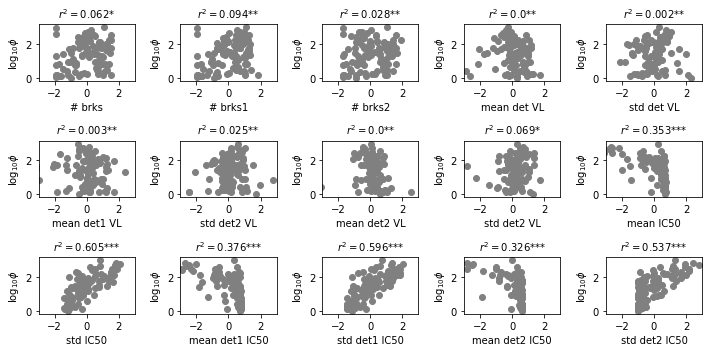

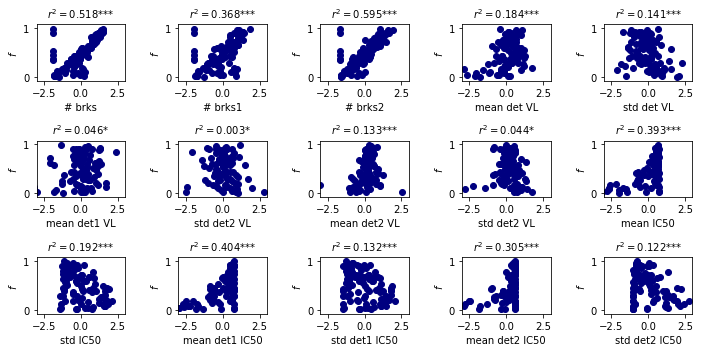

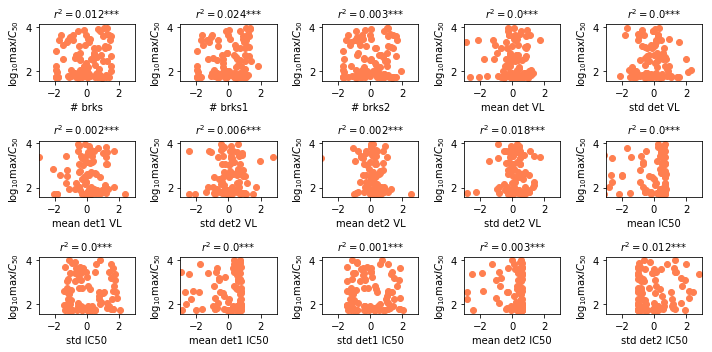

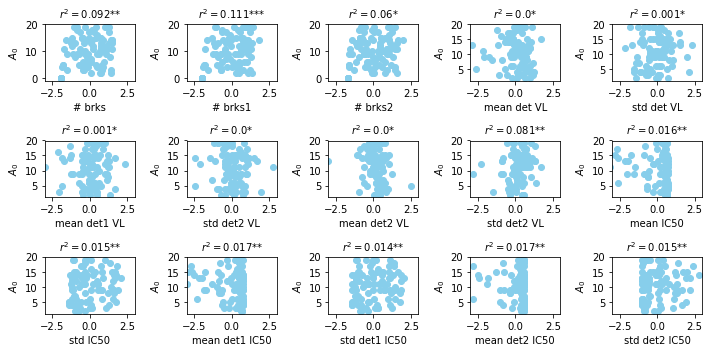

In [137]:
colorz=['gray','navy','coral','skyblue']
outnamez=['# brks','# brks1','# brks2',
       'mean det VL','std det VL','mean det1 VL','std det2 VL','mean det2 VL','std det2 VL',
       'mean IC50','std IC50','mean det1 IC50','std det1 IC50','mean det2 IC50','std det2 IC50']
       
varnamez=[r'$\log_{10}\phi$',r'$f$',r'$\log_{10}\max IC_{50}$',r'$A_0$']

varz=np.array([np.log10(iv),rf,np.log10(mx),A0])

corrzlist=np.zeros([len(varz),len(outcomes)])

for v in range(len(varz)):
    pind=1
    plt.figure(figsize=(10,5))
    for o in range(len(outcomes)):
        plt.subplot(3,5,pind)
        #plt.subplot(len(outcomes),len(varz),pind)
        #plt.scatter(outcomes[o]/np.nanstd(outcomes[o]),varz[v],color=colorz[v])

        xout=outcomes[o,~np.isnan(outcomes[o])]

        yout=varz[v,~np.isnan(outcomes[o])]
        xout=(xout-np.mean(xout))/np.std(xout)
        
        plt.scatter(xout,yout,color=colorz[v])
        corrz=st.pearsonr(xout,yout)
        
        if corrz[1]<0.05:
            pp='*'
        if corrz[1]<0.01:
            pp='**'
        if corrz[1]<0.001:
            pp='***'
            
        corrzlist[v,o]=corrz[0]**2
            
        plt.title(r'$r^2=$' + str(np.round(corrz[0]**2,3))+pp,fontsize=10)
        plt.xlabel(outnamez[o])
        plt.ylabel(varnamez[v])
        plt.xlim([-3,3])
        #calculate correlation
        pind+=1
        
    plt.tight_layout()
    plt.savefig('figures/gsense_'+str(pind)+'.pdf')

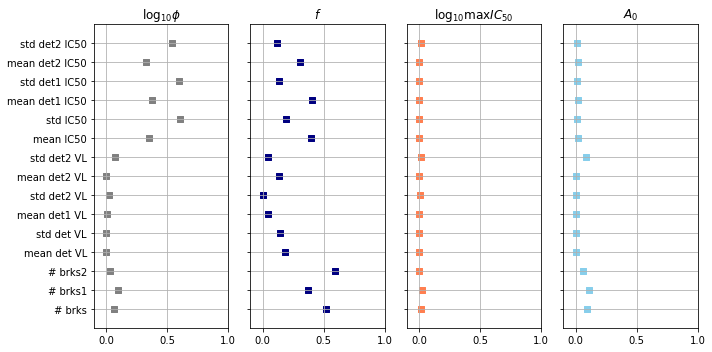

In [138]:
#plot bar plot
plt.figure(figsize=(10,5))
for v in range(len(varz)):
        
    plt.subplot(1,4,v+1)
    
    plt.scatter(corrzlist[v,:],range(len(outcomes)),color=colorz[v],s=30,marker='s')
        
    if v==0:
        plt.yticks(np.arange(len(outcomes)),outnamez)
    else:
        plt.yticks(np.arange(len(outcomes)),'')
        
    plt.ylim([-1,len(outcomes)])
    plt.xlim([-0.1,1])
    plt.title(varnamez[v])

    #plt.axvline(-0.5,ls='--',color='k')
    #plt.axvline(0.5,ls='--',color='k')
    
    plt.grid()
    
plt.tight_layout()
    

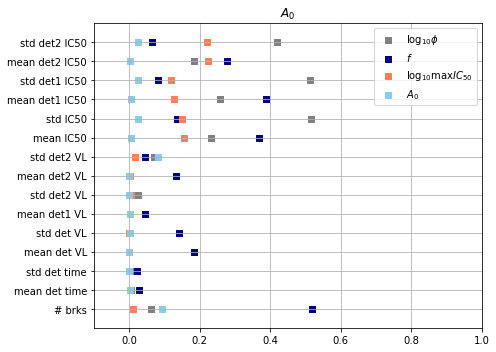

In [116]:
#plot bar plot
plt.figure(figsize=(7,5))
for v in range(len(varz)):
            
    plt.scatter(corrzlist[v,:],range(len(outcomes)),color=colorz[v],s=30,marker='s')
        
plt.yticks(np.arange(len(outcomes)),outnamez)
plt.ylim([-1,len(outcomes)])
plt.xlim([-0.1,1])
plt.title(varnamez[v])

#plt.axvline(-0.5,ls='--',color='k')
#plt.axvline(0.5,ls='--',color='k')
plt.grid()
plt.legend(varnamez)
plt.tight_layout()
    

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars


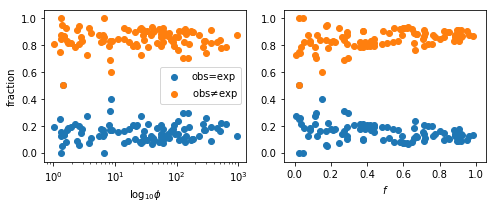

In [183]:
#show how much the delay effect varies across global sensitivity analysis?

#have to figure out if detected interval represents real exposure interval

#check the calculation
print('exposure week:',np.floor(tr_ctl.ex_ts[:10]/7))
print('exposure interval (1st or 2nd):',1+np.floor(tr_ctl.ex_ts[:10]/7/4)%2)

#make the matrix of exposures > detections
def calc_brksmat(tr):
    exts=1+np.floor(tr.ex_ts[tr.fp_ts>0]/7/4)%2
    fpts=1+np.floor(tr.fp_ts[tr.fp_ts>0]/7/4)%2
    brksmat=np.zeros([2,2])
    for i in range(len(exts)):    
        if exts[i]==1 and fpts[i]==1:
            brksmat[0,0]+=1 #exp 1, det 1
        if exts[i]==1 and fpts[i]==2:
            brksmat[0,1]+=1 #exp 1, det 2
        if exts[i]==2 and fpts[i]==1:
            brksmat[1,0]+=1 #exp 2, det next 1
        if exts[i]==2 and fpts[i]==2:
            brksmat[1,1]+=1 #exp 2, det 2

    return brksmat

#calculate for all trials
obstrue=np.zeros([nts])
obsfalse=np.zeros([nts])
for it in range(nts):    
    tr=sens[it]

    brksmat=calc_brksmat(tr)
    
    obstrue[it]=(brksmat[0,0]+brksmat[1,1])/np.sum(brksmat)
    obsfalse[it]=(brksmat[0,1]+brksmat[1,0])/np.sum(brksmat)
    
goodind=~np.isnan(obstrue)
obstrue=obstrue[goodind]
obsfalse=obsfalse[goodind]

plt.figure(figsize=(7,3))

plt.subplot(121)
plt.scatter(iv[goodind],obstrue)
plt.scatter(iv[goodind],obsfalse)
plt.semilogx()
plt.xlabel(varnamez[0])
plt.ylabel('fraction')
plt.legend(['obs=exp',r'obs$\ne$exp'])

plt.subplot(122)
plt.scatter(rf[goodind],obstrue)
plt.scatter(rf[goodind],obsfalse)
plt.xlabel(varnamez[1])

plt.tight_layout()

#visualize another way
plt.figure(figsize=(4,3))
plt.boxplot([obstrue,obsfalse],positions=[1,2],widths=0.7)
#plt.grid()
plt.xticks([1,2],['obs=exp',r'obs$\ne$exp'])
plt.ylabel('fraction')
plt.yticks(np.linspace(0,1,11))
plt.tight_layout()

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

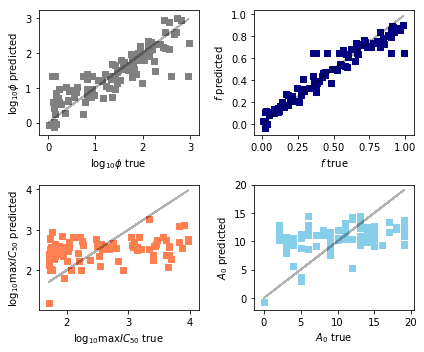

In [232]:
#check on the accuracy of the regression (predictability?)

outcomes[np.isnan(outcomes)]=0 #make sure this is ok, no nans

plt.figure(figsize=(6,5))
for v in range(len(varz)):
        
    reg = sklearn.linear_model.LinearRegression().fit(outcomes.T,varz[v].T)

    plt.subplot(2,2,v+1)
    
    for i in range(nts):
        plt.scatter(varz[v][i],reg.predict(outcomes.T[i])[0],color=colorz[v],s=30,marker='s')
        
    plt.plot(varz[v],varz[v],ls='-',alpha=0.3,color='k')
    
    plt.ylabel(varnamez[v]+' predicted')
    plt.xlabel(varnamez[v]+' true')
    
plt.tight_layout()
plt.savefig('figures/gsense_predicted.pdf')
    

In [225]:
outcomes.T[v]

array([ 22.        ,  18.        ,   4.        ,   4.50543198,
         1.57124155,   4.30374888,   1.66706323,   5.41300595,
         0.25635547,   0.10181594,   1.29554306,  -0.25310719,
         1.16558111,   1.69897   ,   0.        ])